# 第三章 线性回归模型

### 多元线性回归模型

【小白入门系列】车市先知：二手车价格预测赛
使用多元线性回归模型预测二手车价格

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tqdm import tqdm_notebook

In [195]:
df_car = pd.read_csv('./car_price_predict/used_car_train_20200313.csv', delimiter=' ')
df_car.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [196]:
df_car['notRepairedDamage'] = df_car['notRepairedDamage'].replace('-', 0).apply(float)
# 假设df_car是您的数据框
# Ensure regDate and creatDate are date types
df_car['regDate'] = pd.to_datetime(df_car['regDate'], format='%Y%m%d', errors='coerce')
df_car['creatDate'] = pd.to_datetime(df_car['creatDate'], format='%Y%m%d', errors='coerce')

# Calculate the difference and convert to years
df_car['date_diff_years'] = (df_car['creatDate'] - df_car['regDate']).dt.days / 365

# Output the results
print(df_car[['regDate', 'creatDate', 'date_diff_years']])

          regDate  creatDate  date_diff_years
0      2004-04-02 2016-04-04        12.013699
1      2003-03-01 2016-03-09        13.032877
2      2004-04-03 2016-04-02        12.005479
3      1996-09-08 2016-03-12        19.520548
4      2012-01-03 2016-03-13         4.194521
...           ...        ...              ...
149995 2000-06-07 2016-03-27        15.813699
149996 2009-11-02 2016-03-12         6.361644
149997 2010-10-03 2016-03-28         5.487671
149998 2006-03-12 2016-04-01        10.063014
149999 1999-02-04 2016-03-05        17.093151

[150000 rows x 3 columns]


In [203]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SaleID             150000 non-null  int64         
 1   name               150000 non-null  int64         
 2   regDate            138653 non-null  datetime64[ns]
 3   model              149999 non-null  float64       
 4   brand              150000 non-null  int64         
 5   bodyType           145494 non-null  float64       
 6   fuelType           141320 non-null  float64       
 7   gearbox            144019 non-null  float64       
 8   power              150000 non-null  int64         
 9   kilometer          150000 non-null  float64       
 10  notRepairedDamage  150000 non-null  float64       
 11  regionCode         150000 non-null  int64         
 12  seller             150000 non-null  int64         
 13  offerType          150000 non-null  int64   

In [204]:
df_car.nunique()

SaleID               150000
name                  99662
regDate                3597
model                   248
brand                    40
bodyType                  8
fuelType                  7
gearbox                   2
power                   566
kilometer                13
notRepairedDamage         2
regionCode             7905
seller                    2
offerType                 1
creatDate                96
price                  3763
v_0                  143997
v_1                  143998
v_2                  143997
v_3                  143998
v_4                  143998
v_5                  139624
v_6                  109766
v_7                  138709
v_8                  142451
v_9                  140617
v_10                 143997
v_11                 143997
v_12                 143997
v_13                 143998
v_14                 143998
date_diff_years        9042
dtype: int64

In [205]:
df_car.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,date_diff_years
count,150000.000000,150000.000000,138653,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,138653.000000
mean,74999.500000,68349.172873,2004-01-31 17:13:07.932464512,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688,12.142692
min,0.000000,0.000000,1991-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,0.241096
25%,37499.750000,11156.000000,2000-01-04 00:00:00,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034,8.057534
50%,74999.500000,51638.000000,2004-02-10 00:00:00,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246,12.104110
75%,112499.250000,118841.250000,2008-03-04 00:00:00,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378,16.238356
max,149999.000000,196812.000000,2015-12-12 00:00:00,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418,25.265753
std,43301.414527,61103.875095,NaN,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685,5.351238


In [206]:
df_car.isnull().sum()

SaleID                   0
name                     0
regDate              11347
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
date_diff_years      11347
dtype: int64

In [207]:
df_car.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'date_diff_years'],
      dtype='object')

In [209]:
# 使用众数法填充缺失值
for var in df_car.columns.tolist():
    mode_value = df_car[var].mode()[0]
    df_car[var].fillna(mode_value, inplace=True)

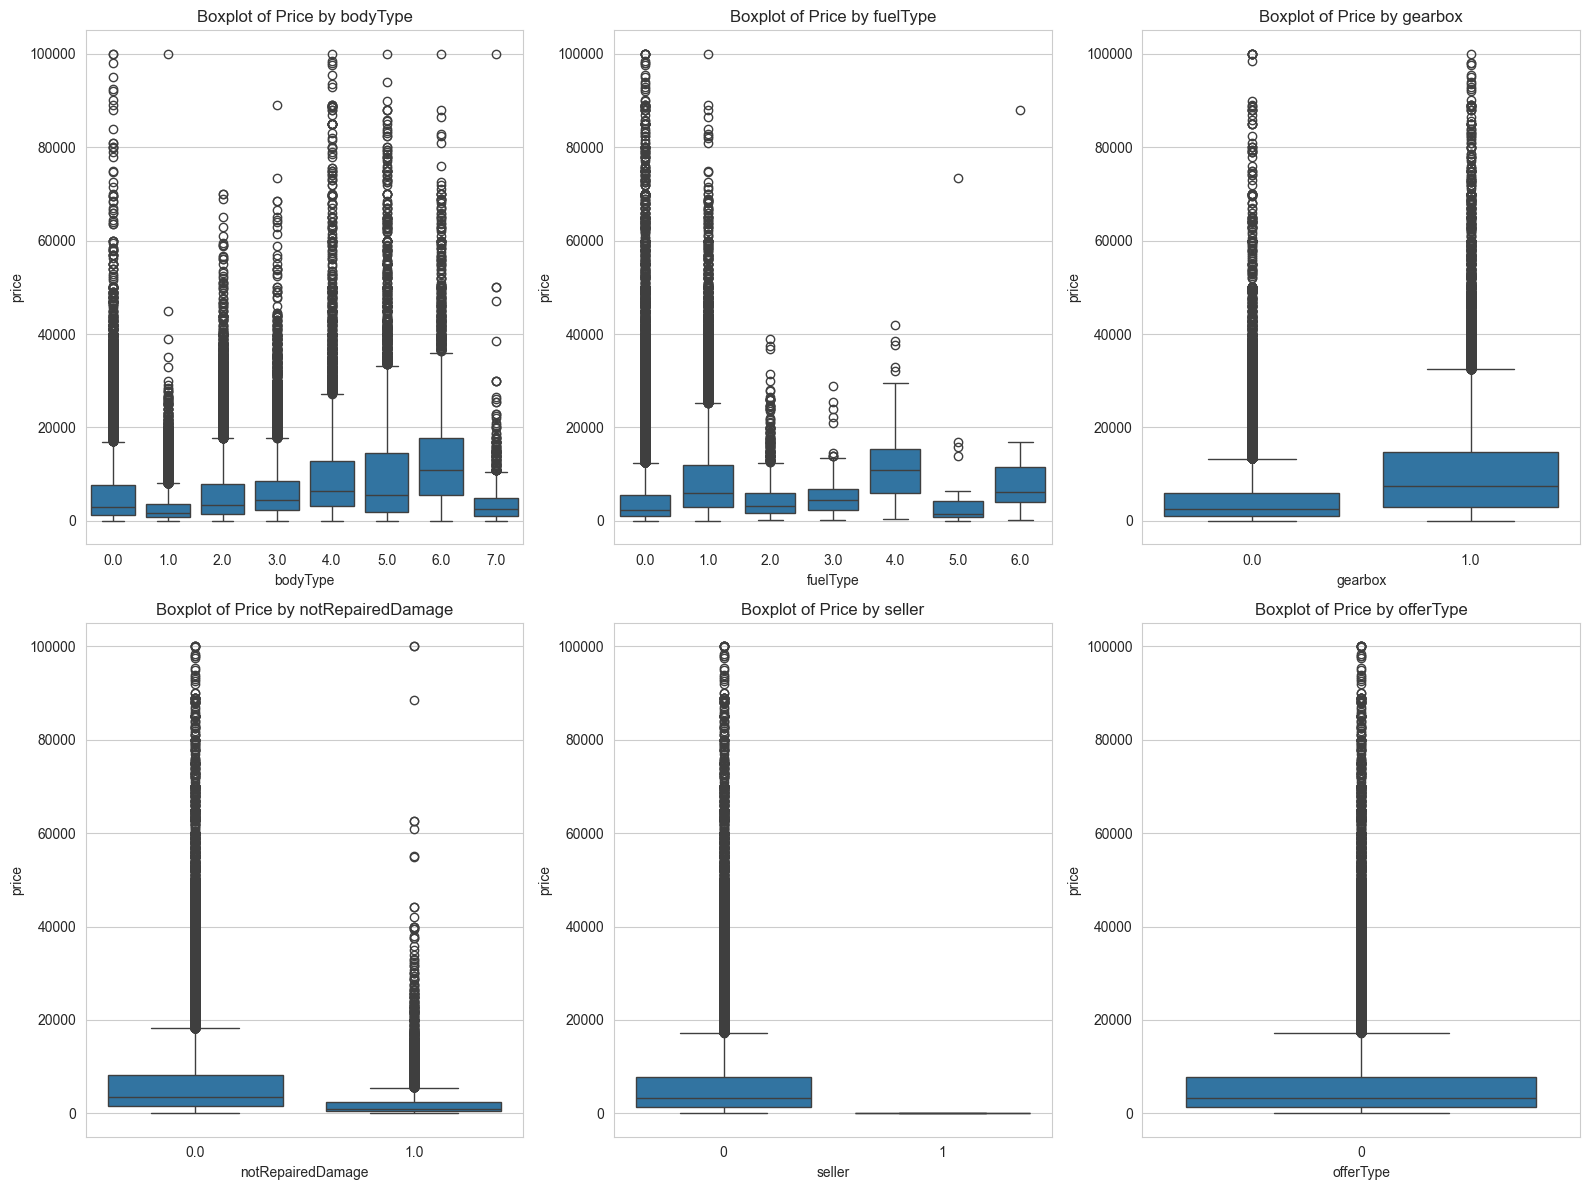

            Variable  Correlation   P-value
0           bodyType     0.248609  0.000000
1           fuelType     0.209510  0.000000
2            gearbox     0.330353  0.000000
3  notRepairedDamage    -0.157523  0.000000
4             seller    -0.002004  0.437609
5          offerType          NaN       NaN


In [210]:
from scipy.stats import pointbiserialr


# 计算点二列相关系数
# 识别所有离散变量
discrete_vars = ['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType']

# 计算点二列相关系数并存储结果
correlation_results = []
for var in discrete_vars:
    corr, p_value = pointbiserialr(df_car[var], df_car['price'])
    correlation_results.append({'Variable': var, 'Correlation': corr, 'P-value': p_value})

# 将结果转换为DataFrame
correlation_df = pd.DataFrame(correlation_results)

# 可视化
plt.figure(figsize=(16, 12))
for i, var in enumerate(discrete_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=var, y='price', data=df_car)
    plt.title(f'Boxplot of Price by {var}')
plt.tight_layout()
plt.show()

# 输出汇总表格
print(correlation_df)

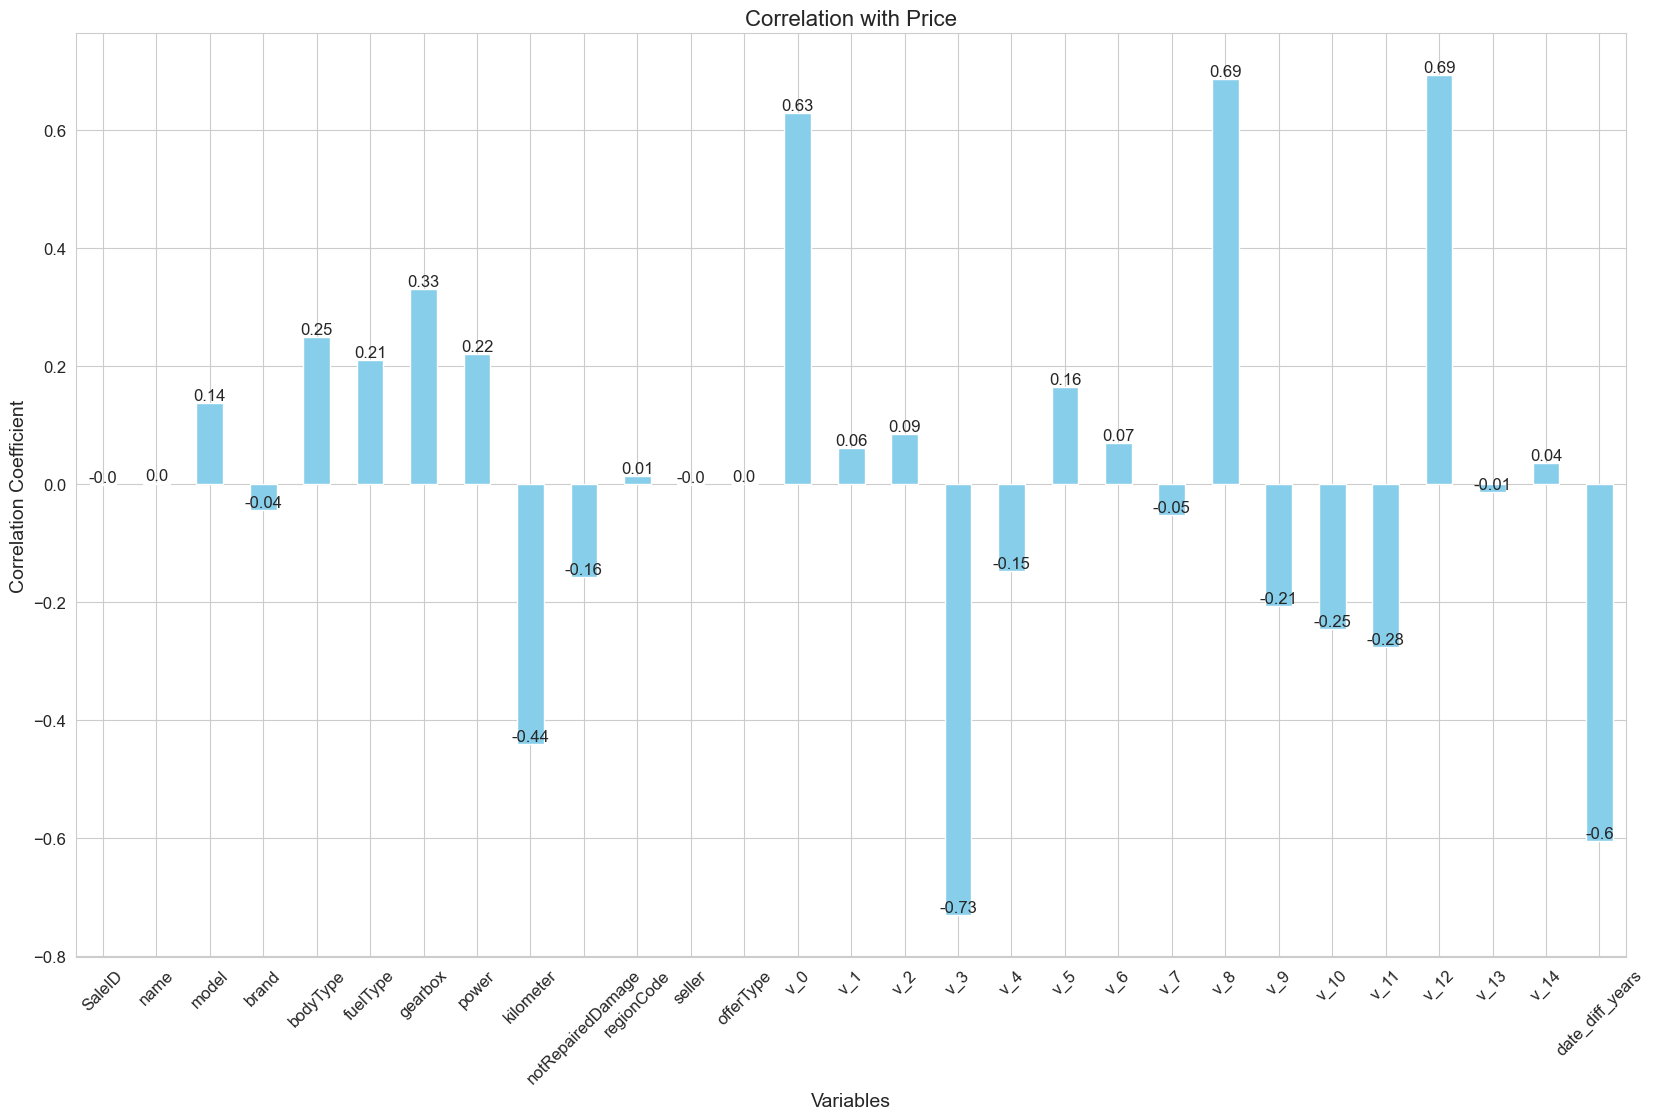

In [211]:
# 计算相关系数矩阵
correlation_matrix = df_car[['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'date_diff_years','price']].corr()

# 获取最后一行的相关系数
last_row = correlation_matrix.iloc[-1, :-1]

# 绘制柱状图
plt.figure(figsize=(20, 12))
bars = last_row.plot(kind='bar', color='skyblue')
plt.title('Correlation with Price', fontsize=16)  # 设置标题字体大小
plt.xlabel('Variables', fontsize=14)  # 设置x轴标签字体大小
plt.ylabel('Correlation Coefficient', fontsize=14)  # 设置y轴标签字体大小
plt.xticks(rotation=45, fontsize=12)  # 设置x轴刻度标签字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度标签字体大小

# 在每个柱子上添加值标签
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom', fontsize=12)

plt.show()


In [212]:
# 获取最后一行的相关系数
last_row = correlation_matrix.iloc[-1, :-1]

# 计算绝对值并排序
sorted_last_row = last_row.abs().sort_values(ascending=False)

# 创建包含绝对值和原始值的DataFrame
result_df = pd.DataFrame({
    'Variable': sorted_last_row.index,
    'Absolute Correlation': sorted_last_row.values,
    'Original Correlation': last_row[sorted_last_row.index].values,
})

# 输出DataFrame表格
print(result_df)


             Variable  Absolute Correlation  Original Correlation
0                 v_3              0.730946             -0.730946
1                v_12              0.692823              0.692823
2                 v_8              0.685798              0.685798
3                 v_0              0.628397              0.628397
4     date_diff_years              0.604168             -0.604168
5           kilometer              0.440519             -0.440519
6             gearbox              0.330353              0.330353
7                v_11              0.275320             -0.275320
8            bodyType              0.248609              0.248609
9                v_10              0.246175             -0.246175
10              power              0.219834              0.219834
11           fuelType              0.209510              0.209510
12                v_9              0.206205             -0.206205
13                v_5              0.164317              0.164317
14  notRep

In [213]:
df_car.isnull().sum()

SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
date_diff_years      0
dtype: int64

In [214]:
X_choose = ['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage'] + [
    'v_3', 'v_12', 'v_8', 'v_0', 'date_diff_years', 'kilometer', 'gearbox', 'v_11',
    'bodyType', 'v_10', 'power', 'fuelType', 'v_9', 'v_5', 'notRepairedDamage', 'v_4'
]
X_choose = list(set(X_choose))

X_car_df = df_car[X_choose]
y_car_df = df_car['price']

In [215]:
X_car_df.describe()

,v_10,v_4,fuelType,kilometer,v_11,power,date_diff_years,v_8,v_12,v_5,notRepairedDamage,v_3,v_9,v_0,gearbox,bodyType
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,-0.001000,0.017875,0.354093,12.597160,0.009035,119.316547,12.212933,0.058144,0.004813,0.248204,0.095433,0.078833,0.061996,44.406268,0.215973,1.738527
std,3.772386,1.193661,0.539747,3.919576,3.286071,177.168419,5.150711,0.029186,2.517478,0.045804,0.293814,2.026514,0.035692,2.457548,0.411497,1.760778
min,-9.168192,-4.364565,0.000000,0.500000,-5.558207,0.000000,0.241096,0.000000,-9.639552,0.000000,0.000000,-7.275037,0.000000,30.451976,0.000000,0.000000
25%,-3.722303,-0.921191,0.000000,12.500000,-1.951543,75.000000,8.454795,0.035334,-1.871846,0.243615,0.000000,-1.462580,0.033930,43.135799,0.000000,0.000000
50%,1.624076,-0.075910,0.000000,15.000000,-0.358053,110.000000,12.819178,0.057014,-0.130753,0.257798,0.000000,0.099722,0.058484,44.610266,0.000000,1.000000
75%,2.844357,0.868758,1.000000,15.000000,1.255022,150.000000,15.931507,0.079382,1.776933,0.265297,0.000000,1.565838,0.087491,46.004721,0.000000,3.000000
max,12.357011,6.829352,6.000000,15.000000,18.819042,19312.000000,25.265753,0.160791,13.847792,0.291838,1.000000,9.854702,0.222787,52.304178,1.000000,7.000000


In [216]:
X_car_df.isnull().sum()

v_10                 0
v_4                  0
fuelType             0
kilometer            0
v_11                 0
power                0
date_diff_years      0
v_8                  0
v_12                 0
v_5                  0
notRepairedDamage    0
v_3                  0
v_9                  0
v_0                  0
gearbox              0
bodyType             0
dtype: int64

In [217]:
# 使用均值法填充缺失值
for var in X_car_df.columns:
    mean_value = X_car_df[var].mean()
    X_car_df[var].fillna(mean_value, inplace=True)

In [218]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_car_df, y_car_df, test_size=0.2, random_state=42)

# 定义模型列表
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net Regression': ElasticNet()
}

# 存储结果
results = {}

# 遍历模型并进行拟合
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }

# 输出结果
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {result['Mean Squared Error']}")
    print(f"  R-squared: {result['R-squared']}")
    print()

Linear Regression:
  Mean Squared Error: 2656.394309721785
  R-squared: 0.6749748685808805

Lasso Regression:
  Mean Squared Error: 2671.98903120892
  R-squared: 0.6672483777683783

Ridge Regression:
  Mean Squared Error: 2658.8372516659947
  R-squared: 0.670996676183764

Elastic Net Regression:
  Mean Squared Error: 2633.6814320095377
  R-squared: 0.6590415549879681



In [219]:
from sklearn.model_selection import cross_val_score, KFold

# 初始化KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 存储结果
mse_scores = []
r2_scores = []
models = []

# 进行五折交叉验证并保存模型
for fold, (train_index, test_index) in tqdm_notebook(enumerate(kf.split(X_car_df))):
    # 定义Elastic Net回归模型
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 这里的alpha和l1_ratio是示例参数，您可以根据需要调整

    X_train, X_test = X_car_df.iloc[train_index], X_car_df.iloc[test_index]
    y_train, y_test = y_car_df.iloc[train_index], y_car_df.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

    models.append(model)

# 计算平均MSE和R-squared
average_mae = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

# 输出结果
print(f"Elastic Net Regression:")
print(f"  Mean Squared Error: {average_mae}")
print(f"  R-squared: {average_r2}")

0it [00:00, ?it/s]

Elastic Net Regression:
  Mean Squared Error: 2683.5513625985877
  R-squared: 0.6612256856635916


In [220]:
df_car_test = pd.read_csv('./car_price_predict/used_car_testB_20200421.csv', delimiter=' ')
df_car_test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [221]:
df_car_test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [222]:
df_car_test['notRepairedDamage'] = df_car_test['notRepairedDamage'].replace('-', 0).apply(float)
# 假设df_car是您的数据框
# Ensure regDate and creatDate are date types
df_car_test['regDate'] = pd.to_datetime(df_car_test['regDate'], format='%Y%m%d', errors='coerce')
df_car_test['creatDate'] = pd.to_datetime(df_car_test['creatDate'], format='%Y%m%d', errors='coerce')

# Calculate the difference and convert to years
df_car_test['date_diff_years'] = (df_car_test['creatDate'] - df_car_test['regDate']).dt.days / 365

# Output the results
print(df_car_test[['regDate', 'creatDate', 'date_diff_years']])

# 使用众数法填充缺失值
for var in df_car_test.columns:
    mode_value = df_car_test[var].mode()[0]
    df_car_test[var].fillna(mode_value, inplace=True)

         regDate  creatDate  date_diff_years
0     2000-05-01 2016-03-08        15.863014
1     1995-02-11 2016-03-10        21.090411
2     2009-06-06 2016-03-09         6.761644
3     2002-06-01 2016-03-14        13.794521
4     2003-03-01 2016-03-06        13.024658
...          ...        ...              ...
49995 2004-10-05 2016-03-09        11.432877
49996 2013-04-09 2016-03-23         2.956164
49997 2004-12-11 2016-03-16        11.268493
49998 2002-07-02 2016-03-27        13.745205
49999 2009-07-08 2016-04-01         6.736986

[50000 rows x 3 columns]


In [223]:
df_car_test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,date_diff_years
0,200000,133777,2000-05-01,67.0,0,1.0,0.0,0.0,101,15.0,...,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322,15.863014
1,200001,61206,1995-02-11,19.0,6,2.0,0.0,0.0,73,6.0,...,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542,21.090411
2,200002,67829,2009-06-06,5.0,5,4.0,0.0,0.0,120,5.0,...,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173,6.761644
3,200003,8892,2002-06-01,22.0,9,1.0,0.0,0.0,58,15.0,...,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610,13.794521
4,200004,76998,2003-03-01,46.0,6,0.0,0.0,0.0,116,15.0,...,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014,13.024658


In [224]:
# 假设您已经有了测试集数据 X_test 和 y_test
# 如果没有，请根据您的实际情况加载测试集数据

# 存储预测结果
X_test = df_car_test[X_choose]
predictions = []

# 使用每个模型进行预测
for model in models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

# 计算平均预测结果
average_predictions = np.mean(predictions, axis=0)
average_predictions = [np.abs(a) for a in average_predictions]

# 输出平均预测结果
print("Average Predictions:")
print(average_predictions[:10])
df_car_test['price'] = average_predictions

Average Predictions:
[603.7173181147249, 5659.507720805935, 11762.19499823682, 441.64783930601186, 2526.3075412643084, 1627.0338445313841, 3530.8880833950293, 5719.0739707916655, 14793.943378010084, 2569.311436436051]


In [225]:
df_car_test

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,date_diff_years,price
0,200000,133777,2000-05-01,67.0,0,1.0,0.0,0.0,101,15.0,...,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322,15.863014,603.717318
1,200001,61206,1995-02-11,19.0,6,2.0,0.0,0.0,73,6.0,...,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542,21.090411,5659.507721
2,200002,67829,2009-06-06,5.0,5,4.0,0.0,0.0,120,5.0,...,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173,6.761644,11762.194998
3,200003,8892,2002-06-01,22.0,9,1.0,0.0,0.0,58,15.0,...,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610,13.794521,441.647839
4,200004,76998,2003-03-01,46.0,6,0.0,0.0,0.0,116,15.0,...,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014,13.024658,2526.307541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,2004-10-05,4.0,4,0.0,0.0,1.0,150,15.0,...,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,11.432877,9830.534398
49996,249996,152834,2013-04-09,65.0,1,0.0,0.0,0.0,179,4.0,...,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,2.956164,17851.077481
49997,249997,132531,2004-12-11,4.0,4,0.0,0.0,1.0,147,12.5,...,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,11.268493,10059.488805
49998,249998,143405,2002-07-02,40.0,1,4.0,0.0,1.0,176,15.0,...,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,13.745205,8878.022457


In [226]:
df_car_test[['SaleID', 'price']].to_csv('./car_price_predict/used_car_testB_results.csv', index=False)

## 其他方法

In [133]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

# import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [134]:
## xgb-Model
X_data, Y_data = X_car_df, y_car_df
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

scores_train = []
scores = []

## 5折交叉验证方式
sk=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):

    train_x=X_data.iloc[train_ind].values
    train_y=Y_data.iloc[train_ind]
    val_x=X_data.iloc[val_ind].values
    val_y=Y_data.iloc[val_ind]

    xgr.fit(train_x,train_y)
    pred_train_xgb=xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)

    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

Train mae: 601.8454710007926
Val mae 683.0009535216777


In [169]:
from typing import Union, Sequence
from collections.abc import Callable
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost.callback import TrainingCallback, LearningRateScheduler, EvaluationMonitor


class AdaptiveLearningRateCallback(LearningRateScheduler):
    def __init__(self, learning_rates=None, patience=500, decay_rate=0.8):
        if learning_rates is None:
            learning_rates = [0.02]
        super().__init__(learning_rates)
        self.patience = patience
        self.decay_rate = decay_rate
        self.scores = []
        self.best_score = float('inf')
        self.best_round = 0
        self.current_lr = None

    def after_iteration(self, model, epoch, evals_log):
        score = evals_log['eval']['score'][-1]
        self.scores.append(score)

        if score < self.best_score:
            self.best_score = score
            self.best_round = epoch
        elif epoch - self.best_round >= self.patience:
            if self.current_lr is None:
                self.current_lr = float(model.attributes().get('learning_rate', '0.02'))  # 初始学习率
            new_lr = self.current_lr * self.decay_rate
            model.set_attr(learning_rate=str(new_lr))
            print(f"Decayed learning rate to {new_lr} at epoch {epoch}")
            self.best_round = epoch  # Reset patience counter
            self.current_lr = new_lr
        return False


class CustomEvaluationMonitor(EvaluationMonitor):
    def __init__(self, period=100, show_stdv=True):
        super().__init__(period=period, show_stdv=show_stdv)

    def after_iteration(self, model, epoch, evals_log):
        if epoch % self.period == 0:
            for name, keywords in evals_log.items():
                if self.show_stdv:
                    mae = keywords["mae"][-1]
                    score = keywords["score"][-1]
                    # print(score, rmse)
                    print(f"[{epoch}] eval-score:{score :.4f} eval-mae:{mae :.4f}")
                else:
                    pass
        return False


# calculate_metrics函数用于计算评估指标
def calculate_metrics_xgboost(preds, data):
    y_pred = preds
    y_true = data.get_label()
    mae = np.mean(np.abs(y_true - y_pred))
    return "score", mae  # True表示分数越低越好

In [170]:
# def build_model_xgb(x_train,y_train):
#     model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
#         colsample_bytree=0.9, max_depth=7) #, objective ='reg:squarederror'
#     model.fit(x_train, y_train)
#     return model

In [171]:
# train函数用于训练模型
def train_K_XGBOOST(feats,
            n_splits: int = 5):
    # 定义k折交叉验证
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    # 开始k折交叉验证
    xgbs = []
    scores = []
    for fold, (train_idx, val_idx) in enumerate(
        kf.split(feats.iloc[:, :]), 1
    ):
        # 准备训练集和验证集
        X_train, X_val = feats.iloc[train_idx, :-1], feats.iloc[val_idx, :-1]
        y_train, y_val = feats.iloc[train_idx, -1], feats.iloc[val_idx, -1]
        # weight_ls = [1 / n_splits] * n_splits

        # 创建XGBoost数据集
        train_data = xgb.DMatrix(X_train, label=y_train)
        val_data = xgb.DMatrix(X_val, label=y_val)

        boost_round = 4000
        early_stop_rounds = int(boost_round * 0.2)

        # 设置XGBoost参数
        params = {
            "booster": "gbtree",
            "objective": "reg:absoluteerror",
            "eval_metric": "mae",
            "max_depth": 10,
            "min_child_weight": 30,
            "n_estimators": 120,
            'gamma': 0,
            "learning_rate": 0.02,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "lambda": 0.1,
            "alpha": 0.2,
            "verbosity": 1,
        }
        # xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        # colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

        # 在训练时使用自适应学习率回调函数
        patience, decay_rate = 500, 0.8 # 数据为样例，并非真实情况
        adaptive_lr = AdaptiveLearningRateCallback(decay_rate=decay_rate, patience=patience) # 学习率适应法，如果分数没有上升的话，学习率会根据 lr * decay_rate 进行调整，也就是超过500EPOCH没有提升的话，学习率会衰减为原来的decay_rate倍
        log = CustomEvaluationMonitor(period=40, show_stdv=True)

        # 训练模型
        xgb_one = xgb.train(
            params,
            train_data,
            num_boost_round=boost_round,
            evals=[(val_data, 'eval')],
            custom_metric=calculate_metrics_xgboost,
            callbacks=[xgb.callback.EarlyStopping(early_stop_rounds, maximize=False), adaptive_lr, log],
            verbose_eval=False
        )

        valid_score = xgb_one.best_score
        print(f"best_valid_score on {fold} model: {valid_score}")
        xgbs.append(xgb_one)
        scores.append(valid_score)

    return xgbs, scores

In [172]:
xgb_X_data = X_data
xgb_X_data['price'] = Y_data
xgb_X_data

,v_10,v_4,fuelType,kilometer,v_11,power,date_diff_years,v_8,v_12,v_5,notRepairedDamage,v_3,v_9,v_0,gearbox,bodyType,price
0,-2.881803,1.143786,0.0,12.5,2.804097,60,12.013699,0.022816,-2.420821,0.235676,0.0,2.159744,0.097462,43.357796,0.0,1.0,1850
1,-4.900482,-1.422165,0.0,15.0,2.096338,0,13.032877,0.026597,-1.030483,0.264777,0.0,1.380657,0.020582,45.305273,0.0,2.0,3600
2,-4.846749,-0.996911,0.0,12.5,1.803559,163,12.005479,0.062173,1.565330,0.251410,0.0,-0.998467,0.027075,45.978359,0.0,1.0,6222
3,-4.509599,-2.228079,0.0,15.0,1.285940,193,19.520548,0.033395,-0.501868,0.274293,0.0,0.883600,0.000000,45.687478,1.0,0.0,2400
4,-1.896240,2.246088,0.0,5.0,0.910783,68,4.194521,0.078819,0.931110,0.228036,0.0,-1.571239,0.121534,44.383511,0.0,1.0,5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.988114,-1.505820,0.0,15.0,-2.983973,163,15.813699,0.071158,0.589167,0.280264,0.0,-0.736609,0.019174,45.316543,1.0,4.0,5900
149996,1.839166,0.698012,0.0,10.0,-2.774615,125,6.361644,0.099681,2.553994,0.253217,0.0,-2.366699,0.079371,45.972058,0.0,0.0,9500
149997,2.439812,1.423661,1.0,6.0,-1.630677,90,5.487671,0.100118,2.290197,0.233353,0.0,-2.279091,0.097914,44.733481,0.0,1.0,7500
149998,2.075380,0.620680,1.0,15.0,-2.633719,156,10.063014,0.083558,1.414937,0.256369,0.0,-1.179812,0.081498,45.658634,0.0,3.0,4999


In [173]:
xgbs, scores = train_K_XGBOOST(xgb_X_data, n_splits=10)

[0] eval-score:4373.6021 eval-mae:4373.6017
[40] eval-score:2380.9951 eval-mae:2380.9954
[80] eval-score:1416.2700 eval-mae:1416.2700
[120] eval-score:986.5587 eval-mae:986.5586
[160] eval-score:798.8037 eval-mae:798.8037
[200] eval-score:718.6317 eval-mae:718.6317
[240] eval-score:685.0752 eval-mae:685.0752
[280] eval-score:667.8124 eval-mae:667.8124
[320] eval-score:660.0880 eval-mae:660.0880
[360] eval-score:655.7543 eval-mae:655.7543
[400] eval-score:651.6609 eval-mae:651.6610
[440] eval-score:647.1523 eval-mae:647.1523
[480] eval-score:641.8156 eval-mae:641.8155
[520] eval-score:636.7794 eval-mae:636.7793
[560] eval-score:632.6418 eval-mae:632.6419
[600] eval-score:629.2543 eval-mae:629.2543
[640] eval-score:626.5512 eval-mae:626.5512
[680] eval-score:623.8220 eval-mae:623.8220
[720] eval-score:621.2714 eval-mae:621.2713
[760] eval-score:619.1760 eval-mae:619.1760
[800] eval-score:617.2553 eval-mae:617.2553
[840] eval-score:615.3157 eval-mae:615.3157
[880] eval-score:613.8441 eval

In [174]:
scores

[585.526245,
 594.595642,
 575.012939,
 597.719116,
 589.677002,
 573.91449,
 584.527954,
 570.289978,
 583.324402,
 575.593872]

In [175]:
np.mean(scores)

583.018164

In [176]:
from typing import List


def ensemble_predict_xgbs(models: List[xgb.XGBRegressor], X):
    """
    使用集成模型进行预测。

    :param models: 训练好的模型列表
    :param X: 测试数据集
    :return: 集成模型的预测结果
    """
    preds = np.zeros((X.shape[0], len(models)))

    for i, model in enumerate(models):
        dmatrix = xgb.DMatrix(X)
        best_iteration = model.best_iteration
        best_score = model.best_score
        # print(best_iteration, best_score)
        preds[:, i] = model.predict(dmatrix)

    # 对所有模型的预测结果取平均值
    final_preds = np.mean(preds, axis=1)
    return final_preds

In [189]:
df_car_test_B = pd.read_csv('./car_price_predict/used_car_testB_20200421.csv', delimiter=' ')
df_car_test_B['notRepairedDamage'] = df_car_test_B['notRepairedDamage'].replace('-', 0).apply(float)
# 假设df_car是您的数据框
# Ensure regDate and creatDate are date types
df_car_test_B['regDate'] = pd.to_datetime(df_car_test_B['regDate'], format='%Y%m%d', errors='coerce')
df_car_test_B['creatDate'] = pd.to_datetime(df_car_test_B['creatDate'], format='%Y%m%d', errors='coerce')

# Calculate the difference and convert to years
df_car_test_B['date_diff_years'] = (df_car_test_B['creatDate'] - df_car_test_B['regDate']).dt.days / 365

# Output the results
print(df_car_test_B[['regDate', 'creatDate', 'date_diff_years']])

# 使用众数法填充缺失值
for var in df_car_test_B.columns:
    mode_value = df_car_test_B[var].mode()[0]
    df_car_test_B[var].fillna(mode_value, inplace=True)

         regDate  creatDate  date_diff_years
0     2000-05-01 2016-03-08        15.863014
1     1995-02-11 2016-03-10        21.090411
2     2009-06-06 2016-03-09         6.761644
3     2002-06-01 2016-03-14        13.794521
4     2003-03-01 2016-03-06        13.024658
...          ...        ...              ...
49995 2004-10-05 2016-03-09        11.432877
49996 2013-04-09 2016-03-23         2.956164
49997 2004-12-11 2016-03-16        11.268493
49998 2002-07-02 2016-03-27        13.745205
49999 2009-07-08 2016-04-01         6.736986

[50000 rows x 3 columns]


In [191]:
# 将所有小于等于0的值替换为0
average_predictions = np.where(average_predictions <= 0, 0, average_predictions).astype(int)

# 输出平均预测结果
print("Average Predictions:")
print(average_predictions[:10])
df_car_test_B['price'] = average_predictions

Average Predictions:
[ 1195  2000  8908  1105  2028  1205   354  3340 11848   606]


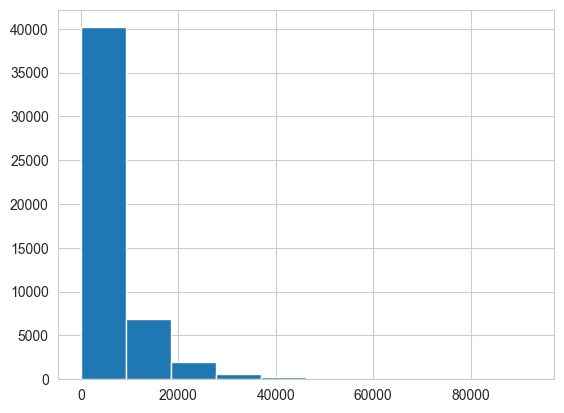

In [192]:
## 查看预测值的统计进行
plt.hist(df_car_test_B['price'])
plt.show()
plt.close()

In [193]:
df_car_test_B[['SaleID', 'price']].to_csv('./car_price_predict/used_car_testB_20200421_result_xgb.csv', index=False)